# Medical Appointments No-Show
## by Emefiele-konyeri Awinrin

# Table Of Contents
1. [Introduction](#intro)
    

2. [Data Gathering](#wrangling)
    
        
3. [Assessing Data](#assess)
    
    3.1 [Quality Issues](#quality)
        
    3.2 [Tidiness Issues](#tidiness)
        
        
4. [Cleaning Data](#cleaning)
    
    4.1 [Issue #1](#issue1)
        
    4.2 [Issue #2](#issue2)
         
        
5. [Storing Data](#storing_data)   
    
    
6. [Exploratory Data Analysis](#eda)
    
    6.1 [Univariate Exploration](#univariate)
        
    6.3 [Bivariate Exploration](#bivariate)
        
7. [Conclusion](#conclusions)
 
    
8. [References](#references)

# <a id='intro'></a>
## Introduction

Patient no-shows are long-standing problems affecting aid utilization and posing risks to the first-class healthcare services. They also lead to a loss of predicted revenue, specifically in services where resources are expensive and in top-notch calls.
In this case study we are going to be working on a public dataset ([Medical Appoinments No-Show](https://www.kaggle.com/datasets/joniarroba/noshowappointments)) stored on kaggle, which will help us to ask intelligent questions, analyze the dataset and then communicate with visuals for proper interactions and understanding. 

The medical appointments no show data contains over one hundred thousand medical appointments with fourteen attributes associated with the data.
*  **PatientId** - Identification of a patient
*  **AppointmentID** - Identification of each appointment
*  **Gender** - Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.
*  **ScheduledDay** - The day of the actuall appointment, when they have to visit the doctor.
*  **AppointmentDay** - The day someone called or registered the appointment, this is before appointment of course.
*  **Age** - How old is the patient.
*  **Neighbourhood** - Where the appointment takes place.
*  **Scholarship** - True of False
*  **Hipertension** - True of False
*  **Diabetes** - True of False
*  **Alcoholism** - True of False
*  **Handcap** - True of False
*  **SMS_received** - 1 or more messages sent to the patient.
*  **No-show** - True of False
*  **Neighbourhood** - True or False.

This analysis aims at discovering the possible reasons behind the high rate of patients not showing up on their scheduled day and to also discover some unpopular trends that will benefit healthcare services. As we go further into the analysis process we must know that this is a tentative approach towards exploring this dataset and there will always be room for improvement

<a id='wrangling'></a>
## Data Wrangling

In [1]:
# let's load the packages needed for this data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 

In [2]:
# let's load the data
no_show_df = pd.read_csv('no_show.csv')

<a id='assess'></a>
## Assessing Data

In [35]:
# visuall assessment
no_show_df.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
PatientId,29872499824296.0,558997776694438.0,4262962299951.0,867951213174.0,8841186448183.0,95985133231274.0,733688164476661.0,3449833394123.0,56394729949972.0,78124564369297.0,734536231958495.0,7542951368435.0,566654781423437.0,911394617215919.0,99884723334928.0,99948393975.0,84574392942817.0,14794966191172.0,17135378245248.0,7223289184215.0
AppointmentID,5642903,5642503,5642549,5642828,5642494,5626772,5630279,5630575,5638447,5629123,5630213,5620163,5634718,5636249,5633951,5620206,5633121,5633460,5621836,5640433
Gender,F,M,F,F,F,F,F,F,F,F,F,M,F,M,F,F,M,F,F,F
ScheduledDay,2016-04-29T18:38:08Z,2016-04-29T16:08:27Z,2016-04-29T16:19:04Z,2016-04-29T17:29:31Z,2016-04-29T16:07:23Z,2016-04-27T08:36:51Z,2016-04-27T15:05:12Z,2016-04-27T15:39:58Z,2016-04-29T08:02:16Z,2016-04-27T12:48:25Z,2016-04-27T14:58:11Z,2016-04-26T08:44:12Z,2016-04-28T11:33:51Z,2016-04-28T14:52:07Z,2016-04-28T10:06:24Z,2016-04-26T08:47:27Z,2016-04-28T08:51:47Z,2016-04-28T09:28:57Z,2016-04-26T10:54:18Z,2016-04-29T10:43:14Z
AppointmentDay,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z
Age,62,56,62,8,56,76,23,39,21,19,30,29,22,28,54,15,50,40,30,46
Neighbourhood,JARDIM DA PENHA,JARDIM DA PENHA,MATA DA PRAIA,PONTAL DE CAMBURI,JARDIM DA PENHA,REPÚBLICA,GOIABEIRAS,GOIABEIRAS,ANDORINHAS,CONQUISTA,NOVA PALESTINA,NOVA PALESTINA,NOVA PALESTINA,NOVA PALESTINA,NOVA PALESTINA,NOVA PALESTINA,NOVA PALESTINA,CONQUISTA,NOVA PALESTINA,DA PENHA
Scholarship,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0
Hipertension,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Diabetes,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [2]:
# Number of samples in the dataset
no_show_df.shape

(110527, 14)

> We have 110527 observations and 14 attributes

In [3]:
# let's see the datatypes of the attributes
no_show_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


> When checking the datatypes of the dataset i noticed the ParentId, AppointmentID, ScheduledDay and AppointmentDay had incorrect datatypes.

In [3]:
# checking duplicated values
no_show_df.duplicated().sum()

0

In [4]:
# let's check for missing values
no_show_df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [45]:
# let's see the number of unique values in each attribute of the dataset
no_show_clean.nunique()

PatientId           62299
AppointmentID      110527
Gender                  2
ScheduledDay       103549
AppointmentDay         27
Age                   104
Neighbourhood          81
Scholarship             2
Hipertension            2
Diabetes                2
Alcoholism              2
Handcap                 5
SMS_received            2
No-show                 2
Scheduleddate         111
Scheduledhour          16
Scheduledday            6
Appointmentdate        27
AwaitingDay           131
dtype: int64

In [5]:
# let's look for outliers
no_show_df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


From the summary statistics age has a minimum age of -1 and maximum age of 115. No age can be less than 0 and ages above 100 calls for some attention because they are rare, the latter will need appropriate investigation but in this analysis they serve as outliers and will be dropped.

In [57]:
# let's check the ages for outliers
no_show_clean['Age'].value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

From the summary statistics had a maximum value of 4 which is inaccurate because the handicap condition is true or false encoded in binary numbers, the maximum number should be 1 and minimum is 0.

In [59]:
# let's check Handcap for outliers
no_show_clean['Handcap'].value_counts()

0    108248
1      2034
2       182
3        13
4         3
Name: Handcap, dtype: int64

<a id='quality'></a>
### Quality issues

1. Erroneous datatypes: `ParentId`, `AppointmentID`, `ScheduledDay` and `AppointmentDay`
    
2. Inaccurate data in columns: `Age` and `Handcap`
    
3. Incorrect attribute names: `Hipertension` and `Handcap`    

<a id='tidiness'></a>
### Tidiness issues
1. More attributes need to be generated from the Appointment day in order to have a broad understanding of the relationship between time and behaviour of the patient

<a id='cleaning'></a>
## Cleaning Data

In [51]:
# Make copies of original pieces of data
no_show_clean = no_show_df.copy()

<a id='issue1'></a>
### Issue #1: Cleaning quality issues in `no_show_clean` table
#### Define: 
1. Erroneous datatypes: `ParentId`, `AppointmentID`, `ScheduledDay` and `AppointmentDay`
    
2. Inaccurate data in columns: `Age` and `Handcap`
    
3. Incorrect attribute names: `Hipertension` and `Handcap`

#### Code for defined issue `1`

In [52]:
#Let's change the datatype of the ParentId, AppointmentId,ScheduledDay and AppointmentDay
no_show_clean['PatientId'] = no_show_clean['PatientId'].astype('int64')
no_show_clean['PatientId'] = no_show_clean['PatientId'].astype(str)
no_show_clean['AppointmentID'] = no_show_clean['AppointmentID'].astype(str)
no_show_clean['ScheduledDay'] = pd.to_datetime(no_show_clean['ScheduledDay'])
no_show_clean['AppointmentDay'] = pd.to_datetime(no_show_clean['AppointmentDay'])

#### Test

In [12]:
no_show_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  object             
 1   AppointmentID   110527 non-null  object             
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

#### Code for defined issue `2`

In [53]:
# let's drop the ages with outliers
no_show_clean = no_show_clean[(no_show_clean['Age'] >= 0) & (no_show_clean['Age'] <= 95)]
no_show_clean['Age'].value_counts()

0     3539
1     2273
52    1746
49    1652
53    1651
      ... 
92      86
91      66
93      53
94      33
95      24
Name: Age, Length: 96, dtype: int64

In [54]:
# cleaning numbers greater 1
no_show_clean['Handcap'] = np.where(no_show_clean['Handcap']>0,1,0)
no_show_clean['Handcap'].value_counts()

0    108248
1      2232
Name: Handcap, dtype: int64

In [7]:
# During the data cleaning i noticed some wrong spelling of the column labels

no_show_clean.rename(columns = {'Hipertension':'Hypertension','Handcap':'Handicap'}, inplace=True)
no_show_clean

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572134369293,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3596266328735,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,15576631729893,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,92134931435557,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No


<a id='issue2'></a>
### Issue #2: Cleaning tidiness issues in `no_show_clean` table
#### Define: 
1. More attributes will need to be derived from the Appointment day :- hour of the day, day of the week, month of the year and awaiting time.
    
2. Age range attribute is needed to this dataset to classify ages into groups to get the behaviour of patients in groups

#### Code for defined issue `1`

In [55]:
# let's get the period in terms of day and date
no_show_clean['Scheduleddate'] = no_show_clean['ScheduledDay'].dt.date
no_show_clean['Appointmentday'] = no_show_clean['AppointmentDay'].dt.strftime('%A')
no_show_clean['Appointmentdate'] = no_show_clean['AppointmentDay'].dt.date

# lets add a new attribute named AwaitingDays from the days between AppointmentDay and ScheduledDay
no_show_clean['AwaitingDays'] = ((no_show_clean['Appointmentdate'] - no_show_clean['Scheduleddate'])/np.timedelta64(1,'D'))
no_show_clean['AwaitingDays'] = no_show_clean['AwaitingDays'].astype('int64')

In [56]:
# lets add a new attribute named Awaitingtime from AwaitingDays
no_show_clean['Awaitingtime'] = pd.cut(x=no_show_clean['AwaitingDays'], bins=[-1,0,3, 7, 15, 30, 90,180],
                    labels=['sameday(0)', 'short(1-3)', 'week(4-7)','fortnight(8-15)',
                            'month(16-30)', 'quarter(31-90)','semester(91-180)'])

#### Test

In [210]:
no_show_clean.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
PatientId,29872499824296,558997776694438,4262962299951,867951213174,8841186448183,95985133231274,733688164476661,3449833394123,56394729949972,78124564369297,734536231958495,7542951368435,566654781423437,911394617215919,99884723334928,99948393975,84574392942817,14794966191172,17135378245248,7223289184215
AppointmentID,5642903,5642503,5642549,5642828,5642494,5626772,5630279,5630575,5638447,5629123,5630213,5620163,5634718,5636249,5633951,5620206,5633121,5633460,5621836,5640433
Gender,F,M,F,F,F,F,F,F,F,F,F,M,F,M,F,F,M,F,F,F
ScheduledDay,2016-04-29 18:38:08+00:00,2016-04-29 16:08:27+00:00,2016-04-29 16:19:04+00:00,2016-04-29 17:29:31+00:00,2016-04-29 16:07:23+00:00,2016-04-27 08:36:51+00:00,2016-04-27 15:05:12+00:00,2016-04-27 15:39:58+00:00,2016-04-29 08:02:16+00:00,2016-04-27 12:48:25+00:00,2016-04-27 14:58:11+00:00,2016-04-26 08:44:12+00:00,2016-04-28 11:33:51+00:00,2016-04-28 14:52:07+00:00,2016-04-28 10:06:24+00:00,2016-04-26 08:47:27+00:00,2016-04-28 08:51:47+00:00,2016-04-28 09:28:57+00:00,2016-04-26 10:54:18+00:00,2016-04-29 10:43:14+00:00
AppointmentDay,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00
Age,62,56,62,8,56,76,23,39,21,19,30,29,22,28,54,15,50,40,30,46
Neighbourhood,JARDIM DA PENHA,JARDIM DA PENHA,MATA DA PRAIA,PONTAL DE CAMBURI,JARDIM DA PENHA,REPÚBLICA,GOIABEIRAS,GOIABEIRAS,ANDORINHAS,CONQUISTA,NOVA PALESTINA,NOVA PALESTINA,NOVA PALESTINA,NOVA PALESTINA,NOVA PALESTINA,NOVA PALESTINA,NOVA PALESTINA,CONQUISTA,NOVA PALESTINA,DA PENHA
Scholarship,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0
Hypertension,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Diabetes,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [211]:
no_show_clean.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,AwaitingDays
count,110480.000000,110480.000000,110480.000000,110480.000000,110480.000000,110480.000000,110480.000000,110480.000000
mean,37.063342,0.098307,0.197076,0.071841,0.030413,0.020203,0.321126,10.183581
std,23.079712,0.297731,0.397792,0.258226,0.171721,0.140694,0.466911,15.252649
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000
max,95.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,179.000000


From the summary statistics we have AwaitingDays with a minimum of -6 which is not accurate and serves an outlier in this analysis

In [57]:
no_show_clean = no_show_clean[~(no_show_clean['AwaitingDays'] < 0)]

In [58]:
no_show_clean[no_show_clean['AwaitingDays'] < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Scheduleddate,Appointmentday,Appointmentdate,AwaitingDays,Awaitingtime


#### Code for defined issue `2`

In [59]:
# let's create a Age range attribute to classify ages into groups

no_show_clean['Age_group'] = pd.cut(x=no_show_clean['Age'], bins=[-1,12,18, 59, 96],
                labels=['child: <13', 'Adolescence: 13-18', 'Adult: 19-59','Senior Adult: >59'])   

#### Test

In [23]:
no_show_clean.head(6).T

,0,1,2,3,4,5
PatientId,29872499824296,558997776694438,4262962299951,867951213174,8841186448183,95985133231274
AppointmentID,5642903,5642503,5642549,5642828,5642494,5626772
Gender,F,M,F,F,F,F
ScheduledDay,2016-04-29 18:38:08+00:00,2016-04-29 16:08:27+00:00,2016-04-29 16:19:04+00:00,2016-04-29 17:29:31+00:00,2016-04-29 16:07:23+00:00,2016-04-27 08:36:51+00:00
AppointmentDay,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00
Age,62,56,62,8,56,76
Neighbourhood,JARDIM DA PENHA,JARDIM DA PENHA,MATA DA PRAIA,PONTAL DE CAMBURI,JARDIM DA PENHA,REPÚBLICA
Scholarship,0,0,0,0,0,0
Hypertension,1,0,0,0,1,1
Diabetes,0,0,0,0,1,0


<a id='storing_data'></a>
## Storing Data
Save gathered, assessed, and cleaned, store master dataset to a CSV file named "no_show_master.csv".

In [217]:
no_show_clean.to_csv('no_show_master.csv',index=False)

<a id='eda'></a>
## Exploratory Data Analysis

<a id='univariate'></a>
### Univariate Data Analysis

In [219]:
# let's see the univariate statistics of each individual variable

no_show_clean.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,AwaitingDays
count,110475.000000,110475.000000,110475.000000,110475.000000,110475.000000,110475.000000,110475.000000,110475.000000
mean,37.063508,0.098312,0.197085,0.071844,0.030414,0.020186,0.321141,10.184132
std,23.079570,0.297737,0.397799,0.258231,0.171725,0.140635,0.466917,15.252768
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000
max,95.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,179.000000


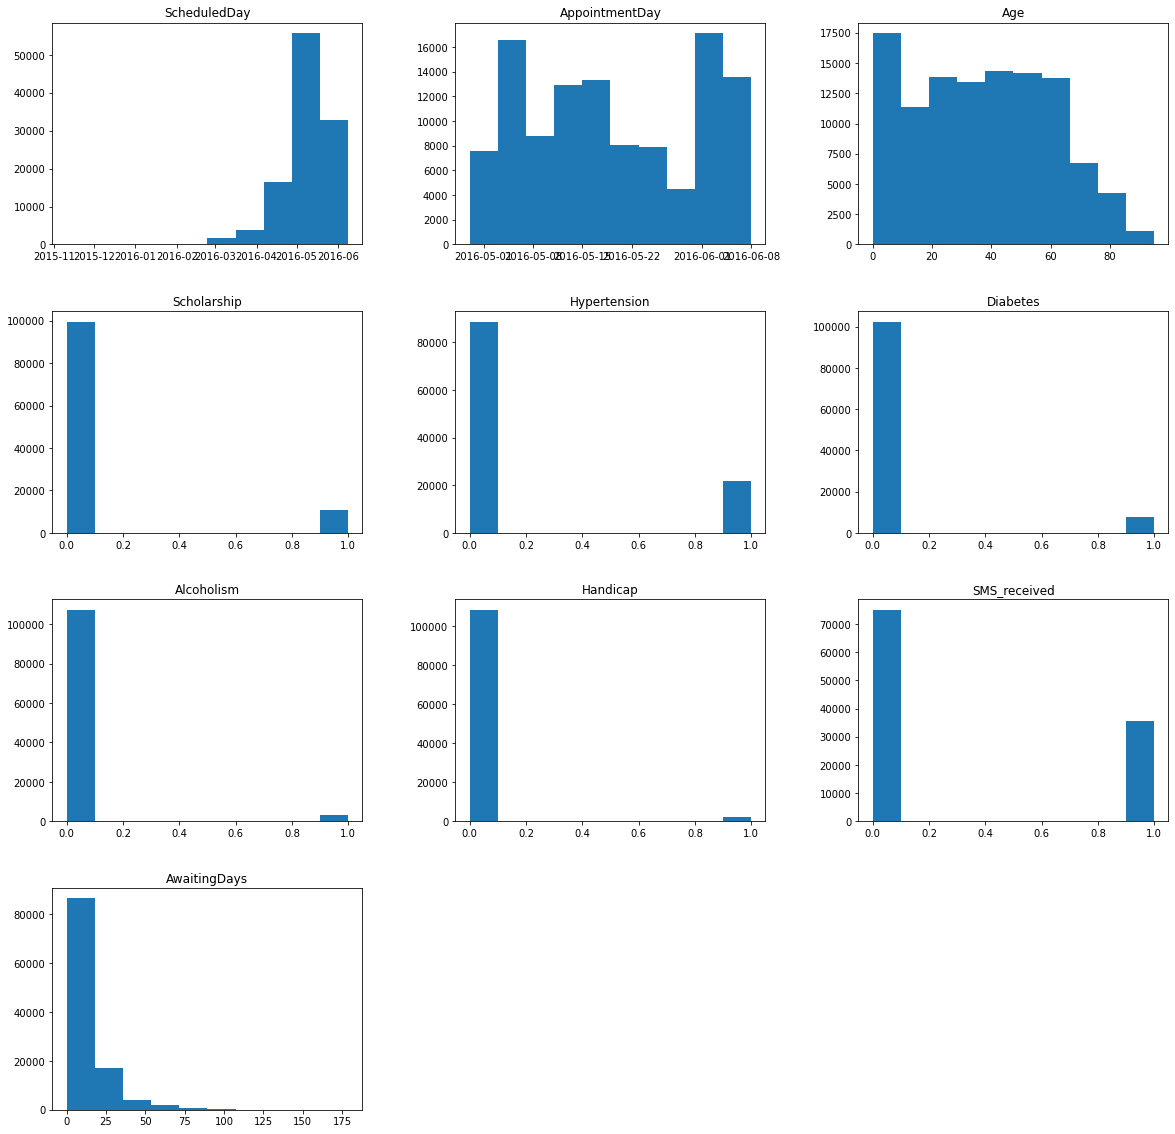

In [222]:
# let's create a univariate histogram chart to display the frequency of each individual variable

no_show_clean.hist(figsize=(20,20),grid=False);

> From the histograms above we can see that the Age and AwaitingDays chart are skewed to the right 

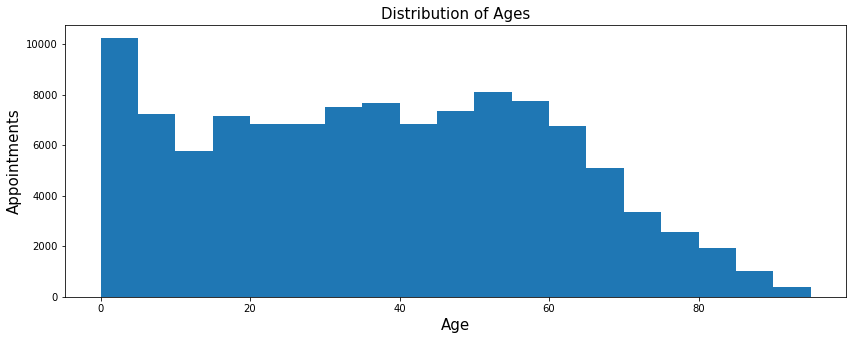

In [231]:
# let's create a histogram chart to display the Distribution of Ages
bins = np.arange(0,no_show_clean['Age'].max()+5,5)
no_show_clean['Age'].hist(figsize=(14,5),bins=bins,grid=False);
plt.xlabel('Age',fontsize=15)
plt.ylabel('Appointments',fontsize=15)
plt.title('Distribution of Ages',fontsize=15);

> This distribution is bimodal with kids the age of 5 or less having the highest number of appointments followed by adults with the age 50 to 55

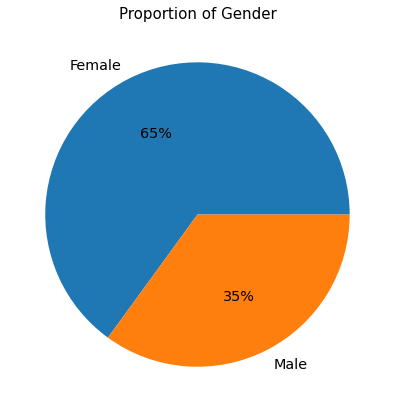

In [229]:
# let's create a univariate pie chart to display the Proportion of Gender
rt = no_show_clean['Gender'].value_counts().reset_index()
plt.figure(figsize=(14,7))
plt.pie(rt['Gender'],labels = ['Female','Male'],autopct='%.0f%%',textprops={'size': 'x-large'});
plt.title('Proportion of Gender',fontsize=15);

> This dataset shows an unequal proportion of gender which would lead to a bias during exploratory data analysis. Equal proportion of gender would eliminate bias in conclusion of the analysis

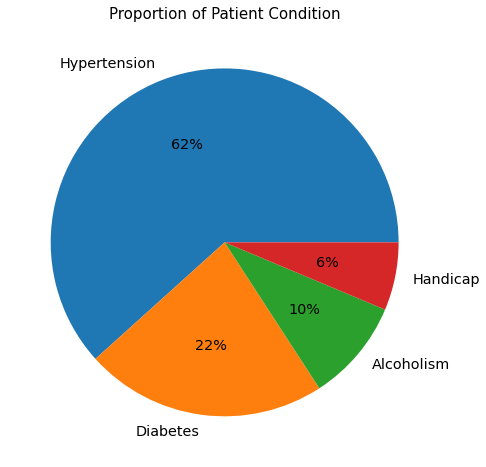

In [230]:
# let's create a univariate pie chart to display the Proportion of Patient Condition

conditions = ['Hypertension','Diabetes','Alcoholism','Handicap']

# creates a function to get all 1's in each column
def condition(conditions):
    data = []
    keys = []
    for i in conditions:
        name = no_show_clean[i].value_counts().name
        value = no_show_clean[i].value_counts().values[1]
        keys.append(name)
        data.append(value)
    return keys,data

plt.figure(figsize=(14,8))
plt.pie(condition(conditions)[1],labels=condition(conditions)[0],autopct='%.0f%%',textprops={'size': 'x-large'})
plt.title('Proportion of Patient Condition',fontsize=15);

> The pie chart tells us that Hypertension patients had the most appointments (62%) in those few months followed by Students on Diabetes patients (22%), Alcoholism patients (10%) and Handicap (6%)

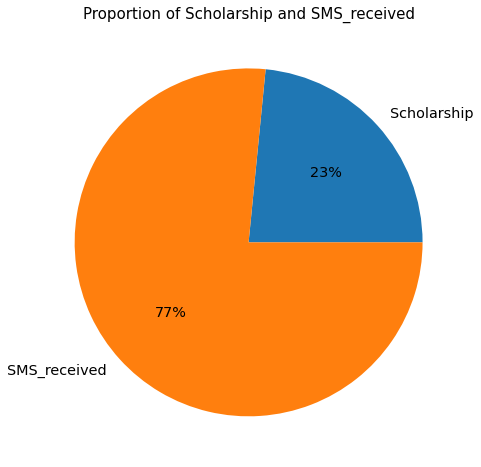

In [232]:
# let's create a univariate pie chart to display the Proportion of Scholarship and SMS_received

conditions = ['Scholarship','SMS_received']

# creates a function to get all 1's in each column
def condition(conditions):
    data = []
    keys = []
    for i in conditions:
        name = no_show_clean[i].value_counts().name
        value = no_show_clean[i].value_counts().values[1]
        keys.append(name)
        data.append(value)
    return keys,data

plt.figure(figsize=(14,8))
plt.pie(condition(conditions)[1],labels=condition(conditions)[0],autopct='%.0f%%',textprops={'size': 'x-large'})
plt.title('Proportion of Scholarship and SMS_received',fontsize=15);

>In comparison of number of appointments between Scholarship and Patients that received a SMS. Patients that received a SMS had more than double the number of appointments as Scholarship.

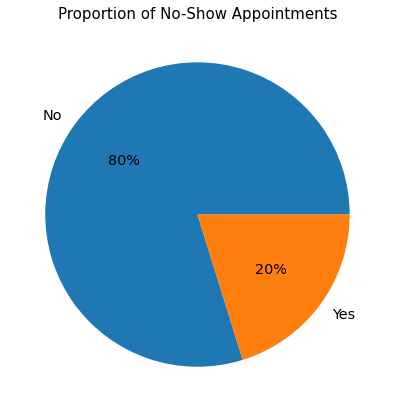

In [233]:
# let's create a univariate pie chart to display the Proportion of No-Show Appointments
rt = no_show_clean['No-show'].value_counts().reset_index()
plt.figure(figsize=(14,7))
plt.pie(rt['No-show'],labels = ['No','Yes'],autopct='%.0f%%',textprops={'size': 'x-large'})
plt.title('Proportion of No-Show Appointments',fontsize=15);

> About 20% of appointments were missed which is quite a large number.

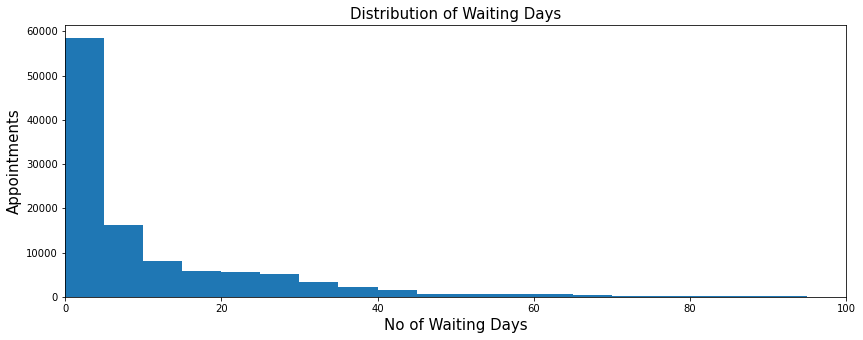

In [238]:
# let's create a histogram chart to display the Distribution of Waiting Days
bins = np.arange(0,no_show_clean['AwaitingDays'].max()+5,5)
no_show_clean['AwaitingDays'].hist(figsize=(14,5),bins=bins,grid=False);
plt.xlim(0,100)
plt.xlabel('No of Waiting Days',fontsize=15)
plt.ylabel('Appointments',fontsize=15)
plt.title('Distribution of Waiting Days',fontsize=15);

>This distribution is positively skewed to the right. The Number of appointments and No of Waiting Days are directly proportional. 

In [242]:
# let's create a dataframe to display the Distribution of Appointments in Neighbourhoods
conditions_df = no_show_clean[['AppointmentID','Neighbourhood']]
conditions_df = conditions_df.groupby(['Neighbourhood']).count().reset_index()
conditions_df= conditions_df.sort_values('AppointmentID',ascending=False)
conditions_df

,Neighbourhood,AppointmentID
38,JARDIM CAMBURI,7714
43,MARIA ORTIZ,5804
59,RESISTÊNCIA,4430
39,JARDIM DA PENHA,3874
36,ITARARÉ,3514
...,...,...
31,ILHA DO BOI,35
32,ILHA DO FRADE,10
0,AEROPORTO,8
34,ILHAS OCEÂNICAS DE TRINDADE,2


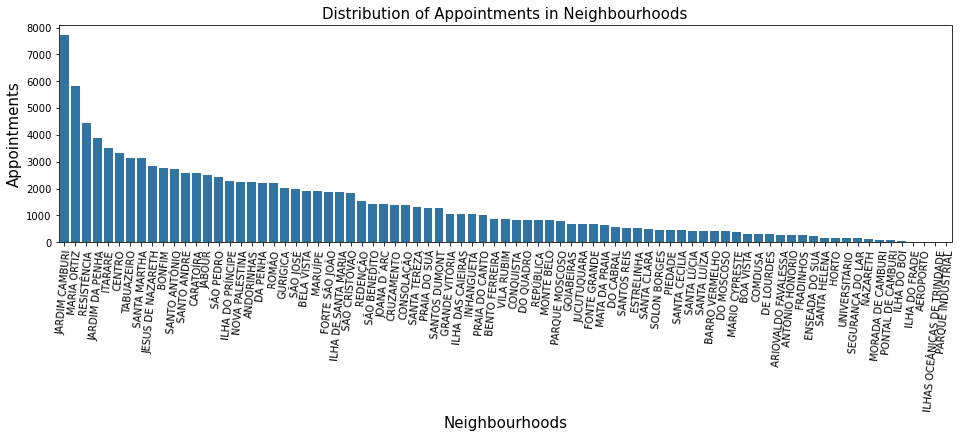

In [243]:
# let's create a bar chart to display the Distribution of Appointments in Neighbourhoods
plt.figure(figsize=(16,4))
sns.barplot(data=conditions_df,x='Neighbourhood',y='AppointmentID',color=sns.color_palette()[0])
plt.xticks(rotation=85);
plt.xlabel('Neighbourhoods',fontsize=15)
plt.ylabel('Appointments',fontsize=15)
plt.title('Distribution of Appointments in Neighbourhoods',fontsize=15);

> Jardim Camburi is the neighbourhood with the highest number of Appointments and Parque Industrial the neighbourhood with the least number of Appointments

<a id='bivariate'></a>
### Bivariate Data Analysis

In [271]:
# let's create a dataframe to display the Distribution of Age groups and No-Show rate
age_df = no_show_clean[['Age_group','No-show']]
age_df['No-show'] = np.where(age_df['No-show']=='Yes',1,0)
age_df = age_df.groupby('Age_group').sum().reset_index()
age_df['No-show-rate'] = (age_df['No-show']/len(no_show_clean))*100
age_df['No-show-rate(%)'] = age_df['No-show-rate'].apply(lambda x: '{0:.2f}%'.format(x))
age_df

C:\Users\HP.PC\AppData\Local\Temp/ipykernel_7304/2318785226.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_df['No-show'] = np.where(age_df['No-show']=='Yes',1,0)


,Age_group,No-show,No-show-rate,No-show-rate(%)
0,Adolescence: 13-18,2040,1.846572,1.85%
1,Adult: 19-59,12727,11.520253,11.52%
2,Senior Adult: >59,3234,2.927359,2.93%
3,child: <13,4306,3.897714,3.90%


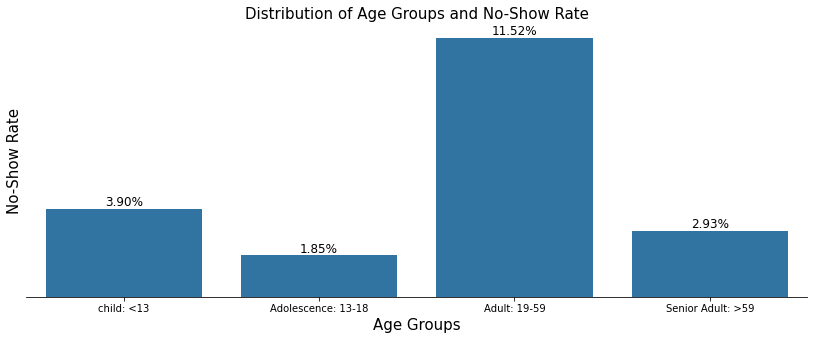

In [260]:
# let's create a bar chart to display the Distribution of Age groups and No-Show rate
fig, ax = plt.subplots(figsize=(14,5))
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_yaxis().set_ticks([])
splot = sns.barplot(data=age_df,x='Age_group',y='No-show-rate',color=sns.color_palette()[0],ax=ax,order=['child: <13','Adolescence: 13-18','Adult: 19-59','Senior Adult: >59'])
plt.bar_label(splot.containers[0],labels=['3.90%','1.85%','11.52%','2.93%'],fontsize=12);
plt.xlabel('Age Groups',fontsize=15)
plt.ylabel('No-Show Rate',fontsize=15)
plt.title('Distribution of Age Groups and No-Show Rate',fontsize=15);

> So out of the 20% of No-Show appointments in the dataset Adults had about 11.52% No-Show rate which is more than the total No-Show rate of the other age groups 

In [261]:
# let's create a dataframe to display the Distribution of Gender and No-Show rate
conditions_df = no_show_clean[['AppointmentID','Gender','No-show']]
conditions_df = conditions_df[conditions_df['No-show'] != 'No'].groupby(['No-show','Gender']).count().reset_index()
conditions_df['No-show-rate'] = (conditions_df['AppointmentID']/len(no_show_clean))*100
conditions_df['No-show-rate(%)'] = conditions_df['No-show-rate'].apply(lambda x: '{0:.2f}%'.format(x))
conditions_df

,No-show,Gender,AppointmentID,No-show-rate,No-show-rate(%)
0,Yes,F,14585,13.202082,13.20%
1,Yes,M,7722,6.989817,6.99%


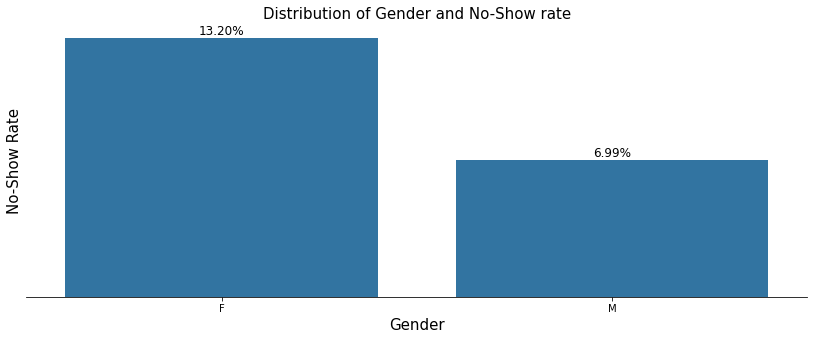

In [262]:
# let's create a bar chart to display the Distribution of Gender and No-Show rate
fig, ax = plt.subplots(figsize=(14,5))
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_yaxis().set_ticks([])
splot = sns.barplot(data=conditions_df,x='Gender',y='No-show-rate',color=sns.color_palette()[0])
plt.bar_label(splot.containers[0],labels=conditions_df['No-show-rate(%)'],fontsize=12);
plt.xlabel('Gender',fontsize=15)
plt.ylabel('No-Show Rate',fontsize=15)
plt.title('Distribution of Gender and No-Show rate',fontsize=15);

> Female patients have a No-Show of rate 13.20% which is 6.21% greater than Male patients. This conclusion is bias though because female patients had almost double the number of appointments as male patients.

In [15]:
# let's create a dataframe to display the Distribution of Health conditions and No-Show rate
conditions_df = no_show_clean[['Hypertension','Diabetes','Alcoholism','Handicap','No-show']]
conditions_df = conditions_df[conditions_df['No-show'] != 'No'].groupby('No-show').sum().reset_index()
conditions_df = pd.melt(conditions_df, id_vars =['No-show'], value_vars =['Hypertension','Diabetes','Alcoholism','Handicap'],
                var_name ='Health conditions', value_name ='Sum')
conditions_df['No-show-rate'] = (conditions_df['Sum']/len(no_show_clean['No-show'] != 'No'))*100
conditions_df['No-show-rate(%)'] = conditions_df['No-show-rate'].apply(lambda x: '{0:.2f}%'.format(x))
conditions_df

,No-show,Health conditions,Sum,No-show-rate,No-show-rate(%)
0,Yes,Hypertension,3768,3.410726,3.41%
1,Yes,Diabetes,1430,1.294411,1.29%
2,Yes,Alcoholism,677,0.612808,0.61%
3,Yes,Handicap,402,0.363883,0.36%


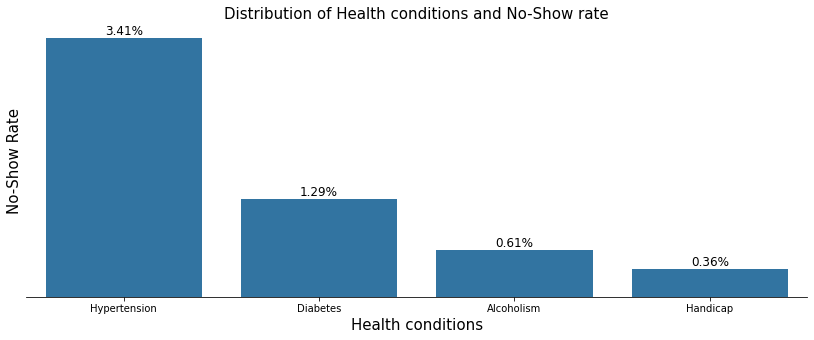

In [16]:
# let's create a bar chart to display the Distribution of Health conditions and No-Show rate
fig, ax = plt.subplots(figsize=(14,5))
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_yaxis().set_ticks([])
splot = sns.barplot(data=conditions_df,x='Health conditions',y='No-show-rate',color=sns.color_palette()[0])
plt.bar_label(splot.containers[0],labels=conditions_df['No-show-rate(%)'],fontsize=12);
plt.xlabel('Health conditions',fontsize=15)
plt.ylabel('No-Show Rate',fontsize=15)
plt.title('Distribution of Health conditions and No-Show rate',fontsize=15);

> Hypersion patients have the highest No-Show rate of all the Health related conditions with a No-Show rate of 3.41% and Handicap seeming to have the least No-Show rate 

In [19]:
# let's create a dataframe to display the Distribution of some types of conditions and No-Show rate
conditions_df = no_show_clean[['Scholarship','SMS_received','No-show']]
conditions_df = conditions_df[conditions_df['No-show'] != 'No'].groupby('No-show').sum().reset_index()
conditions_df = pd.melt(conditions_df, id_vars =['No-show'], value_vars =['Scholarship','SMS_received'],
                var_name ='Type', value_name ='Sum')
conditions_df['No-show-rate'] = (conditions_df['Sum']/len(no_show_clean))*100
conditions_df['No-show-rate(%)'] = conditions_df['No-show-rate'].apply(lambda x: '{0:.2f}%'.format(x))
conditions_df

,No-show,Type,Sum,No-show-rate,No-show-rate(%)
0,Yes,Scholarship,2578,2.333560,2.33%
1,Yes,SMS_received,9784,8.856302,8.86%


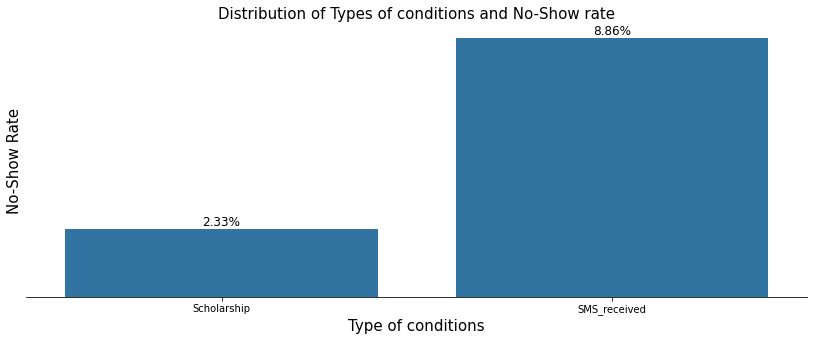

In [20]:
# let's create a bar chart to display the Distribution of some types of conditions and No-Show rate
fig, ax = plt.subplots(figsize=(14,5))
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_yaxis().set_ticks([])
splot = sns.barplot(data=conditions_df,x='Type',y='No-show-rate',color=sns.color_palette()[0])
plt.bar_label(splot.containers[0],labels=conditions_df['No-show-rate(%)'],fontsize=12)
plt.xlabel('Type of conditions',fontsize=15)
plt.ylabel('No-Show Rate',fontsize=15)
plt.title('Distribution of Types of conditions and No-Show rate',fontsize=15);

> Even after receiving text messages, patients on a scholarship have a No-Show rate which is far less than half the No-Show rate of patients with SMS received

In [24]:
# let's create a dataframe to display the Distribution of AwaitingDays and No-Show rate
conditions_df = no_show_clean[['AwaitingDays','No-show','Awaitingtime']]
conditions_df = conditions_df[conditions_df['No-show'] != 'No'].groupby(['No-show','Awaitingtime']).count().reset_index()
conditions_df['No-show-rate'] = (conditions_df['AwaitingDays']/len(no_show_clean))*100
conditions_df['No-show-rate(%)'] = conditions_df['No-show-rate'].apply(lambda x: '{0:.2f}%'.format(x))
conditions_df

,No-show,Awaitingtime,AwaitingDays,No-show-rate,No-show-rate(%)
0,Yes,sameday(0),1790,1.620276,1.62%
1,Yes,short(1-3),3357,3.038697,3.04%
2,Yes,week(4-7),4413,3.994569,3.99%
3,Yes,fortnight(8-15),4165,3.770084,3.77%
4,Yes,month(16-30),5159,4.669835,4.67%
5,Yes,quarter(31-90),3367,3.047748,3.05%
6,Yes,semester(91-180),56,0.050690,0.05%


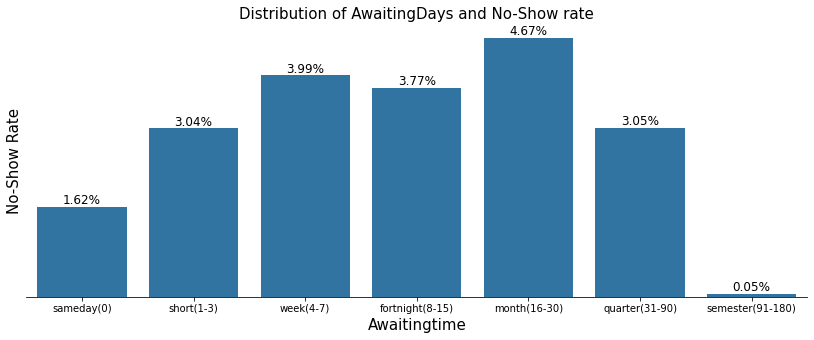

In [25]:
# let's create a bar chart to display the Distribution of AwaitingDays and No-Show rate
fig, ax = plt.subplots(figsize=(14,5))
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_yaxis().set_ticks([])
splot = sns.barplot(data=conditions_df,x='Awaitingtime',y='No-show-rate',color=sns.color_palette()[0])
plt.bar_label(splot.containers[0],labels=conditions_df['No-show-rate(%)'],fontsize=12)
plt.xlabel('Awaitingtime',fontsize=15)
plt.ylabel('No-Show Rate',fontsize=15)
plt.title('Distribution of AwaitingDays and No-Show rate',fontsize=15);

> Patients that have an awaiting time of a month have the highest No-Show rate, patients with an awaiting time of the same day have a low No-Show rate compared to awaiting time of a month

In [26]:
# let's create a dataframe to display the Distribution of Appointmentdate and No-Show rate
conditions_df = no_show_clean[['AppointmentID','Appointmentdate','No-show']]
conditions_df = conditions_df[conditions_df['No-show'] != 'No'].groupby(['No-show','Appointmentdate']).count().reset_index()
conditions_df['No-show-rate(%)'] = (conditions_df['AppointmentID']/len(no_show_clean))*100
conditions_df

,No-show,Appointmentdate,AppointmentID,No-show-rate(%)
0,Yes,2016-04-29,632,0.572075
1,Yes,2016-05-02,861,0.779362
2,Yes,2016-05-03,830,0.751301
3,Yes,2016-05-04,972,0.879837
4,Yes,2016-05-05,806,0.729577
5,Yes,2016-05-06,795,0.719620
6,Yes,2016-05-09,1018,0.921475
7,Yes,2016-05-10,990,0.896130
8,Yes,2016-05-11,885,0.801086
9,Yes,2016-05-12,837,0.757637


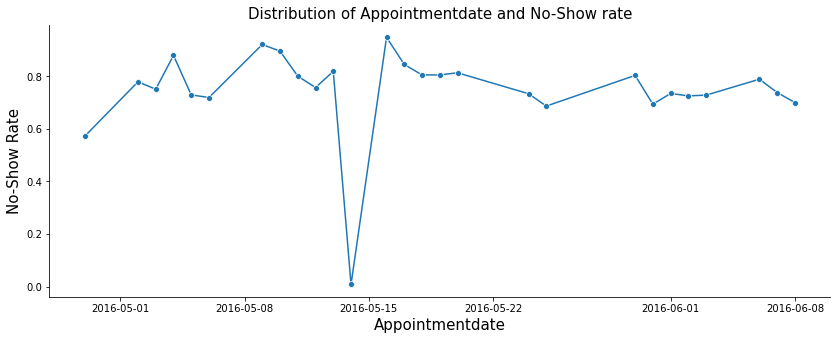

In [28]:
# let's create a bar chart to display the Distribution of Appointmentdate and No-Show rate
fig, ax = plt.subplots(figsize=(14,5))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('Relationship between Month and number of Tweets')
sns.lineplot(data=conditions_df,x='Appointmentdate',y='No-show-rate(%)',color=sns.color_palette()[0],marker='o')
plt.xlabel('Appointmentdate',fontsize=15)
plt.ylabel('No-Show Rate',fontsize=15)
plt.title('Distribution of Appointmentdate and No-Show rate',fontsize=15);

> Apart from a sharp deep on 2016-05-14 the lineplot has a sporadic distribution

In [29]:
# let's create a dataframe to display the Distribution of Appointmentday and No-Show rate
conditions_df = no_show_clean[['AppointmentID','Appointmentday','No-show']]
conditions_df = conditions_df[conditions_df['No-show'] != 'No'].groupby(['No-show','Appointmentday']).count().reset_index()
conditions_df['No-show-rate'] = (conditions_df['AppointmentID']/len(no_show_clean))*100
conditions_df['No-show-rate(%)'] = conditions_df['No-show-rate'].apply(lambda x: '{0:.2f}%'.format(x))
conditions_df

,No-show,Appointmentday,AppointmentID,No-show-rate,No-show-rate(%)
0,Yes,Friday,4036,3.653315,3.65%
1,Yes,Monday,4687,4.242589,4.24%
2,Yes,Saturday,9,0.008147,0.01%
3,Yes,Thursday,3335,3.018783,3.02%
4,Yes,Tuesday,5148,4.659878,4.66%
5,Yes,Wednesday,5092,4.609188,4.61%


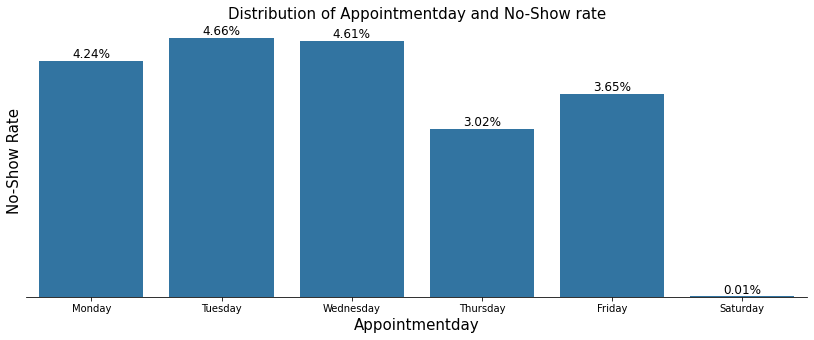

In [30]:
# let's create a bar chart to display the Distribution of Appointmentday and No-Show rate
fig, ax = plt.subplots(figsize=(14,5))
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_yaxis().set_ticks([])
splot = sns.barplot(data=conditions_df,x='Appointmentday',y='No-show-rate',color=sns.color_palette()[0],order=[ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.bar_label(splot.containers[0],labels=['4.24%','4.66%','4.61%','3.02%','3.65%','0.01%'],fontsize=12)
plt.xlabel('Appointmentday',fontsize=15)
plt.ylabel('No-Show Rate',fontsize=15)
plt.title('Distribution of Appointmentday and No-Show rate',fontsize=15);

> From assessment the No-Show rate is higher before midweek and lower after midweek maybe due to the intensity of work which tends to be at the beginning of the week

In [31]:
# let's create a dataframe to display the Distribution of Neighbourhood and No-Show rate
conditions_df = no_show_clean[['AppointmentID','Neighbourhood','No-show']]
conditions_df = conditions_df[conditions_df['No-show'] != 'No'].groupby(['No-show','Neighbourhood']).count().reset_index()
conditions_df['No-show-rate(%)'] = (conditions_df['AppointmentID']/len(no_show_clean))*100
conditions_df= conditions_df.sort_values('No-show-rate(%)',ascending=False)
conditions_df

,No-show,Neighbourhood,AppointmentID,No-show-rate(%)
38,Yes,JARDIM CAMBURI,1465,1.326092
43,Yes,MARIA ORTIZ,1219,1.103417
36,Yes,ITARARÉ,923,0.835483
58,Yes,RESISTÊNCIA,905,0.819190
10,Yes,CENTRO,703,0.636343
...,...,...,...,...
53,Yes,PONTAL DE CAMBURI,12,0.010862
31,Yes,ILHA DO BOI,3,0.002716
34,Yes,ILHAS OCEÂNICAS DE TRINDADE,2,0.001810
32,Yes,ILHA DO FRADE,2,0.001810


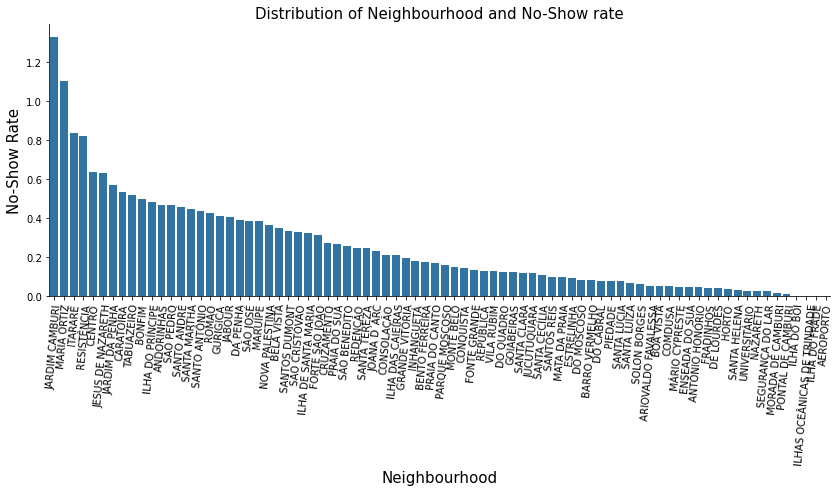

In [32]:
# let's create a bar chart to display the Distribution of Neighbourhood and No-Show rate
fig, ax = plt.subplots(figsize=(14,5))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
sns.barplot(data=conditions_df,x='Neighbourhood',y='No-show-rate(%)',color=sns.color_palette()[0])
plt.xticks(rotation=85)
plt.xlabel('Neighbourhood',fontsize=15)
plt.ylabel('No-Show Rate',fontsize=15)
plt.title('Distribution of Neighbourhood and No-Show rate',fontsize=15);

> The neighbourhood JARDIM CAMBURI has the highest number of appointments while AEROPORTO has the lowest number of appointments

C:\Users\HP.PC\AppData\Local\Temp/ipykernel_6604/2158120237.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['No-show'] = np.where(data['No-show']=='Yes',1,0)


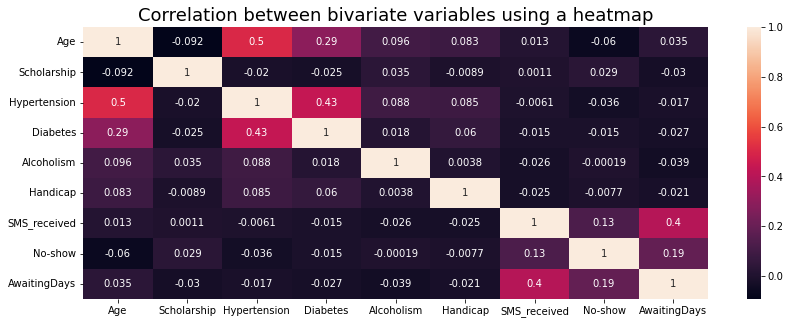

In [34]:
# let's see the correlation between bivariate variables using a heatmap

conditions = ['Age','Scholarship','Hypertension','Diabetes','Alcoholism','Handicap','SMS_received','No-show','AwaitingDays']
data = no_show_clean[conditions]
data['No-show'] = np.where(data['No-show']=='Yes',1,0)
plt.figure(figsize=(14,5))
sns.heatmap(data =data.corr(),annot=True)
plt.title('Correlation between bivariate variables using a heatmap',fontsize=18)

plt.show()

From the heatmap we can see that there is a postive correlation between this groups:
* Age and Hypertension
* Age and Diabetes
* Hypertension and Diabetes
* No_show and AwaitingDays
* No_show and SMS_received

<a id='question1'></a>
### Questions Asked

#### What is total number of Appointments and No show compared between the gender of the patient and the number of awaiting days ?

In [60]:
# let's create a dataframe to display the Distribution of Awaitingtime and Gender in No-Show
conditions_df = no_show_clean[['No-show','Gender','Awaitingtime','AppointmentID']]
conditions_df = conditions_df[conditions_df['No-show'] != 'No'].groupby(['No-show','Gender','Awaitingtime']).count().reset_index()
conditions_df

,No-show,Gender,Awaitingtime,AppointmentID
0,Yes,F,sameday(0),916
1,Yes,F,short(1-3),2223
2,Yes,F,week(4-7),2974
3,Yes,F,fortnight(8-15),2834
4,Yes,F,month(16-30),3438
5,Yes,F,quarter(31-90),2160
6,Yes,F,semester(91-180),40
7,Yes,M,sameday(0),874
8,Yes,M,short(1-3),1134
9,Yes,M,week(4-7),1439


In [53]:
# let's create a dataframe to display the Distribution of Awaitingtime and No-show-rate
conditions2_df = no_show_clean[['AppointmentID','No-show','Awaitingtime']]
conditions2_df = conditions2_df[conditions2_df['No-show'] != 'No'].groupby(['No-show','Awaitingtime']).count().reset_index()
conditions2_df['No-show-rate'] = (conditions2_df['AppointmentID']/len(no_show_clean))*100
conditions2_df['No-show-rate(%)'] = conditions2_df['No-show-rate'].apply(lambda x: '{0:.2f}%'.format(x))
conditions2_df['No-show-rate(500x)'] = (conditions2_df['No-show-rate'])*500
conditions2_df

,No-show,Awaitingtime,AwaitingDays,No-show-rate,No-show-rate(%),No-show-rate(500x)
0,Yes,sameday(0),1790,1.620276,1.62%,810.138040
1,Yes,short(1-3),3357,3.038697,3.04%,1519.348269
2,Yes,week(4-7),4413,3.994569,3.99%,1997.284453
3,Yes,fortnight(8-15),4165,3.770084,3.77%,1885.041865
4,Yes,month(16-30),5159,4.669835,4.67%,2334.917402
5,Yes,quarter(31-90),3367,3.047748,3.05%,1523.874180
6,Yes,semester(91-180),56,0.050690,0.05%,25.345101


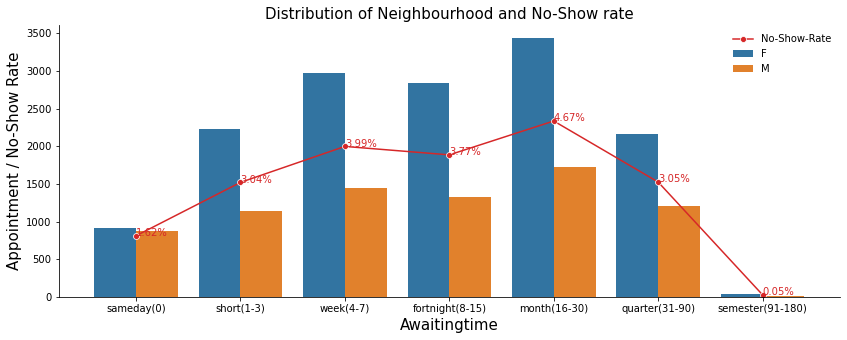

In [58]:
# let's create a bar chart to display the Distribution of Neighbourhood vs No of Appointments and Neighbourhood vs No-show-rate
fig, ax = plt.subplots(figsize=(14,5))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
sns.barplot(data=conditions_df,x='Awaitingtime',y='AppointmentID',hue='Gender',ax=ax)
sns.lineplot(data=conditions2_df,x='Awaitingtime',y='No-show-rate(500x)',color=sns.color_palette()[3],ax=ax,marker='o',label='No-Show-Rate')
[ax.text(p[0], p[1], p[2], color=sns.color_palette()[3]) for p in zip(ax.get_xticks(), conditions2_df['No-show-rate(500x)'],conditions2_df['No-show-rate(%)'])]
plt.xlabel('Awaitingtime',fontsize=15)
plt.ylabel('Appointment / No-Show Rate',fontsize=15)
plt.title('Distribution of Neighbourhood vs No of Appointments and Neighbourhood vs No-show-rate',fontsize=15)
plt.legend(frameon = False);

> Monthly waiting time has the most number of appointments and highest No Show rate in the chart, with female patients having the most number of appointments in all waiting times

#### What is total number of Appointments and No show compared between the gender and age of the patient ?

In [62]:
# let's create a dataframe to display the Distribution of Age groups and Gender in No-Show
conditions_df = no_show_clean[['No-show','Gender','Age_group','AppointmentID']]
conditions_df = conditions_df[conditions_df['No-show'] != 'No'].groupby(['No-show','Gender','Age_group']).count().reset_index()
conditions_df

,No-show,Gender,Age_group,AppointmentID
0,Yes,F,child: <13,2050
1,Yes,F,Adolescence: 13-18,1260
2,Yes,F,Adult: 19-59,9042
3,Yes,F,Senior Adult: >59,2233
4,Yes,M,child: <13,2256
5,Yes,M,Adolescence: 13-18,780
6,Yes,M,Adult: 19-59,3685
7,Yes,M,Senior Adult: >59,1001


In [61]:
# let's create a dataframe to display the Distribution of Age groups and No-show-rate
conditions2_df = no_show_clean[['AppointmentID','No-show','Age_group']]
conditions2_df = conditions2_df[conditions2_df['No-show'] != 'No'].groupby(['No-show','Age_group']).count().reset_index()
conditions2_df['No-show-rate'] = (conditions2_df['AppointmentID']/len(no_show_clean))*100
conditions2_df['No-show-rate(%)'] = conditions2_df['No-show-rate'].apply(lambda x: '{0:.2f}%'.format(x))
conditions2_df['No-show-rate(500x)'] = (conditions2_df['No-show-rate'])*500
conditions2_df

,No-show,Age_group,AppointmentID,No-show-rate,No-show-rate(%),No-show-rate(500x)
0,Yes,child: <13,4306,3.897714,3.90%,1948.857208
1,Yes,Adolescence: 13-18,2040,1.846572,1.85%,923.285811
2,Yes,Adult: 19-59,12727,11.520253,11.52%,5760.126726
3,Yes,Senior Adult: >59,3234,2.927359,2.93%,1463.679566


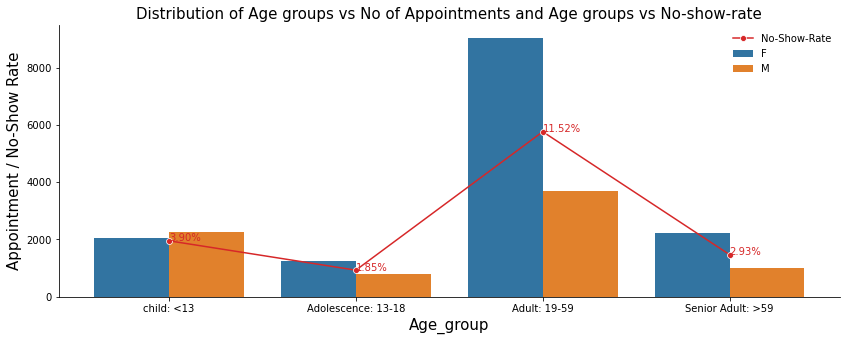

In [63]:
# let's create a bar chart to display the Distribution of Age groups vs No of Appointments and Age groups vs No-show-rate
fig, ax = plt.subplots(figsize=(14,5))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
sns.barplot(data=conditions_df,x='Age_group',y='AppointmentID',hue='Gender',ax=ax)
sns.lineplot(data=conditions2_df,x='Age_group',y='No-show-rate(500x)',color=sns.color_palette()[3],ax=ax,marker='o',label='No-Show-Rate')
[ax.text(p[0], p[1], p[2], color=sns.color_palette()[3]) for p in zip(ax.get_xticks(), conditions2_df['No-show-rate(500x)'],conditions2_df['No-show-rate(%)'])]
plt.xlabel('Age_group',fontsize=15)
plt.ylabel('Appointment / No-Show Rate',fontsize=15)
plt.title('Distribution of Age groups vs No of Appointments and Age groups vs No-show-rate',fontsize=15)
plt.legend(frameon = False);

> Adults(19-59) have the highest number of appointments and highest no-show-rate while Adolescence have the least number of appointments and least no-show-rate

#### Which day of the week has the highest number of appointments and no show rate

In [62]:
# let's create a dataframe to display the Distribution of Awaitingtime and No of appointments
conditions_df = no_show_clean[['No-show','Appointmentday','AppointmentID']]
conditions_df = conditions_df[conditions_df['No-show'] != 'No'].groupby(['No-show','Appointmentday']).count().reset_index()
conditions_df

,No-show,Appointmentday,AppointmentID
0,Yes,Friday,4036
1,Yes,Monday,4687
2,Yes,Saturday,9
3,Yes,Thursday,3335
4,Yes,Tuesday,5148
5,Yes,Wednesday,5092


In [33]:
# let's create a dataframe to display the Distribution of Awaitingtime and No-show-rate
conditions2_df = no_show_clean[['AppointmentID','No-show','Appointmentday']]
conditions2_df = conditions2_df[conditions2_df['No-show'] != 'No'].groupby(['No-show','Appointmentday']).count().reset_index()
conditions2_df['No-show-rate'] = (conditions2_df['AppointmentID']/len(no_show_clean))*100
conditions2_df['No-show-rate(%)'] = conditions2_df['No-show-rate'].apply(lambda x: '{0:.2f}%'.format(x))
conditions2_df['No-show-rate(500x)'] = (conditions2_df['No-show-rate'])*500
conditions2_df

,No-show,Appointmentday,AppointmentID,No-show-rate,No-show-rate(%),No-show-rate(500x)
0,Yes,Friday,4036,3.653315,3.65%,1826.657615
1,Yes,Monday,4687,4.242589,4.24%,2121.294411
2,Yes,Saturday,9,0.008147,0.01%,4.073320
3,Yes,Thursday,3335,3.018783,3.02%,1509.391265
4,Yes,Tuesday,5148,4.659878,4.66%,2329.938900
5,Yes,Wednesday,5092,4.609188,4.61%,2304.593800


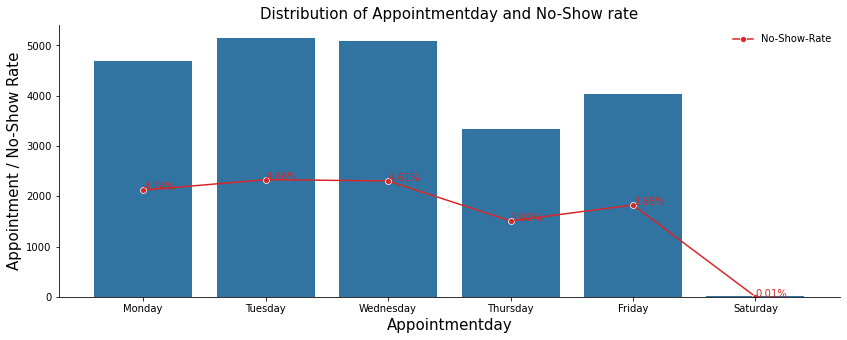

In [75]:
# let's create a bar chart to display the Distribution of Appointmentday vs No of Appointments and Appointmentday vs No-Show rate
fig, ax = plt.subplots(figsize=(14,5))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
sns.barplot(data=conditions_df,x='Appointmentday',y='AppointmentID',color=sns.color_palette()[0],ax=ax,order=[ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
sns.lineplot(data=conditions2_df,x='Appointmentday',y='No-show-rate(500x)',color=sns.color_palette()[3],ax=ax,marker='o',label='No-Show-Rate')
[ax.text(p[0], p[1], p[2], color=sns.color_palette()[3]) for p in zip(ax.get_xticks(), conditions2_df['No-show-rate(500x)'],conditions2_df['No-show-rate(%)'])]
plt.xlabel('Appointmentday',fontsize=15)
plt.ylabel('Appointment / No-Show Rate',fontsize=15)
plt.title('Distribution of Appointmentday vs No of Appointments and Appointmentday vs No-Show rate',fontsize=15)
plt.legend(frameon = False);

> The No-Show rate and No of Appointments are higher before midweek and lower after midweek. The No-Show rate and No of Appointments seems to be directly proportional(the higher the appointments the higher the no show rate)

#### Which Neighbourhood has the highest number of no show appointments and no show rate

In [78]:
# let's create a dataframe to display the Distribution of Neighbourhood and No of appointments
conditions_df = no_show_clean[['AppointmentID','Neighbourhood','No-show']]
conditions_df = conditions_df[conditions_df['No-show'] != 'No'].groupby(['No-show','Neighbourhood']).count().sort_values('AppointmentID',ascending=False).reset_index()
conditions_df

,No-show,Neighbourhood,AppointmentID
0,Yes,JARDIM CAMBURI,1465
1,Yes,MARIA ORTIZ,1219
2,Yes,ITARARÉ,923
3,Yes,RESISTÊNCIA,905
4,Yes,CENTRO,703
...,...,...,...
75,Yes,PONTAL DE CAMBURI,12
76,Yes,ILHA DO BOI,3
77,Yes,ILHAS OCEÂNICAS DE TRINDADE,2
78,Yes,ILHA DO FRADE,2


In [83]:
# let's create a dataframe to display the Distribution of Neighbourhood and No-show-rate
conditions2_df = no_show_clean[['Neighbourhood','No-show','AppointmentID']]
conditions2_df = conditions2_df[conditions2_df['No-show'] != 'No'].groupby(['No-show','Neighbourhood']).count().sort_values('AppointmentID',ascending=False).reset_index()
conditions2_df['No-show-rate'] = (conditions2_df['AppointmentID']/len(no_show_clean))*100
conditions2_df['No-show-rate(%)'] = conditions2_df['No-show-rate'].apply(lambda x: '{0:.2f}%'.format(x))
conditions2_df['No-show-rate(1000x)'] = (conditions2_df['No-show-rate'])*1000
conditions2_df

,No-show,Neighbourhood,AppointmentID,No-show-rate,No-show-rate(%),No-show-rate(1000x)
0,Yes,JARDIM CAMBURI,1465,1.326092,1.33%,1326.091876
1,Yes,MARIA ORTIZ,1219,1.103417,1.10%,1103.417063
2,Yes,ITARARÉ,923,0.835483,0.84%,835.483141
3,Yes,RESISTÊNCIA,905,0.819190,0.82%,819.189862
4,Yes,CENTRO,703,0.636343,0.64%,636.343064
...,...,...,...,...,...,...
75,Yes,PONTAL DE CAMBURI,12,0.010862,0.01%,10.862186
76,Yes,ILHA DO BOI,3,0.002716,0.00%,2.715547
77,Yes,ILHAS OCEÂNICAS DE TRINDADE,2,0.001810,0.00%,1.810364
78,Yes,ILHA DO FRADE,2,0.001810,0.00%,1.810364


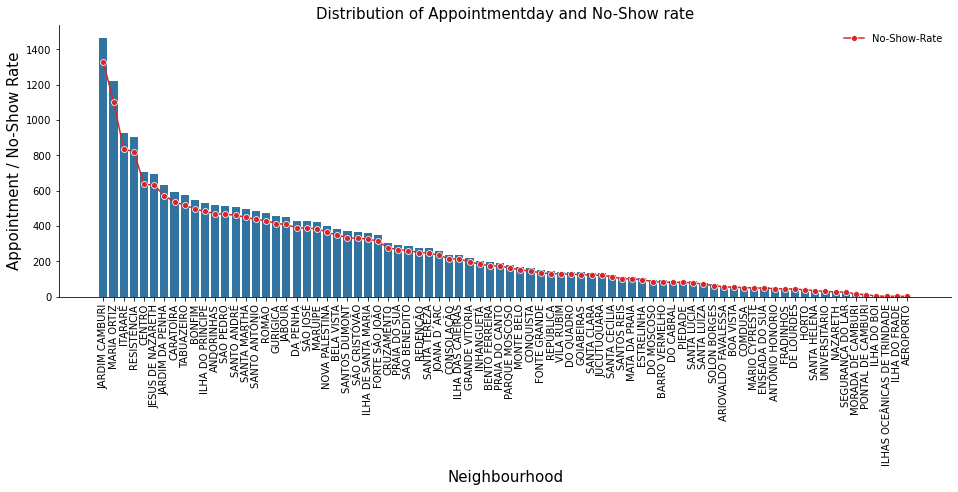

In [86]:
# let's create a bar chart to display the Distribution of Neighbourhood vs No of Appointments and Neighbourhood vs No-Show rate
fig, ax = plt.subplots(figsize=(16,5))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
sns.barplot(data=conditions_df,x='Neighbourhood',y='AppointmentID',color=sns.color_palette()[0],ax=ax)
sns.lineplot(data=conditions2_df,x='Neighbourhood',y='No-show-rate(1000x)',color=sns.color_palette()[3],ax=ax,marker='o',label='No-Show-Rate')
plt.xticks(rotation=90)
plt.xlabel('Neighbourhood',fontsize=15)
plt.ylabel('Appointment / No-Show Rate',fontsize=15)
plt.title('Distribution of Neighbourhood vs No of Appointments and Neighbourhood vs No-Show rate',fontsize=15)
plt.legend(frameon = False);

>The neighbourhood JARDIM CAMBURI has the highest number of no show appointments and no show rate while AEROPORTO has the lowest number of no show appointments and no show rate

<a href="question4"></a>
#### Is there a correlation between Scheduled Day of appointment and number of awaiting days

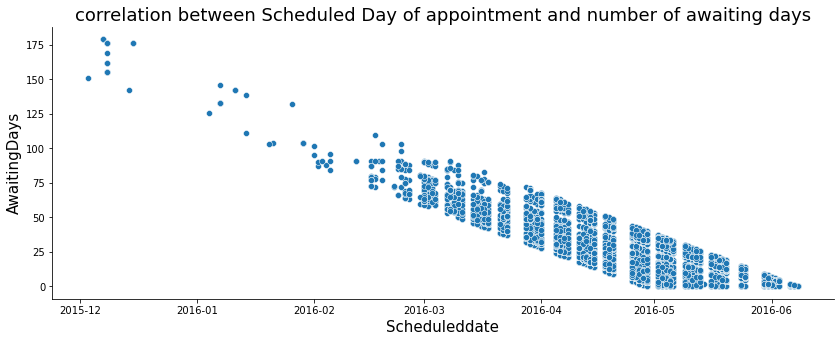

In [87]:
# let's create a bar plot to show correlation between Scheduled Day of appointment and number of awaiting days

# Scatter plot graph
fig, ax = plt.subplots(figsize=(14,5))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
sns.scatterplot(data=no_show_clean[no_show_clean['No-show']!='No'],x= 'Scheduleddate',y='AwaitingDays')
plt.xlabel('Scheduleddate',fontsize=15)
plt.ylabel('AwaitingDays',fontsize=15)
plt.title('correlation between Scheduled Day of appointment and number of awaiting days',fontsize=18);

> Number of no shows has been increasing over the months even after the awaitingdays have been decreasing. which makes it a negative correlation between the two attributes

#### Which attribute had the highest no show rate across waiting days ?

In [88]:
# Creating a heatmap to show the distribution of no show rate across different atrributes
conditions_df = no_show_clean[['Scholarship','Hypertension','Diabetes',
                    'Alcoholism','Handicap','Awaitingtime','SMS_received','No-show']]
conditions_df = conditions_df[conditions_df['No-show'] != 'No'].groupby(['No-show','Awaitingtime']).sum().reset_index()
conditions_df = pd.melt(conditions_df, id_vars =['No-show','Awaitingtime'], value_vars =['Scholarship','Hypertension','Diabetes',
                    'Alcoholism','Handicap','SMS_received'],
                var_name ='Conditions', value_name ='Sum')
conditions_df['No-show-rate'] = (conditions_df['Sum']/len(no_show_clean))*100
conditions_df = conditions_df.pivot("Awaitingtime", "Conditions",
                        "No-show-rate")
conditions_df

Conditions,Alcoholism,Diabetes,Handicap,Hypertension,SMS_received,Scholarship
Awaitingtime,,,,,,
sameday(0),0.050690,0.079656,0.064268,0.211813,0.000000,0.221770
short(1-3),0.108622,0.314098,0.076035,0.709663,0.174700,0.291469
week(4-7),0.159312,0.298710,0.071509,0.756732,2.309120,0.477031
fortnight(8-15),0.109527,0.220864,0.045259,0.613714,2.041186,0.530437
month(16-30),0.114958,0.238063,0.069699,0.671645,2.578864,0.540394
quarter(31-90),0.067889,0.136683,0.032587,0.417289,1.718941,0.267934
semester(91-180),0.001810,0.006336,0.004526,0.029871,0.033492,0.004526


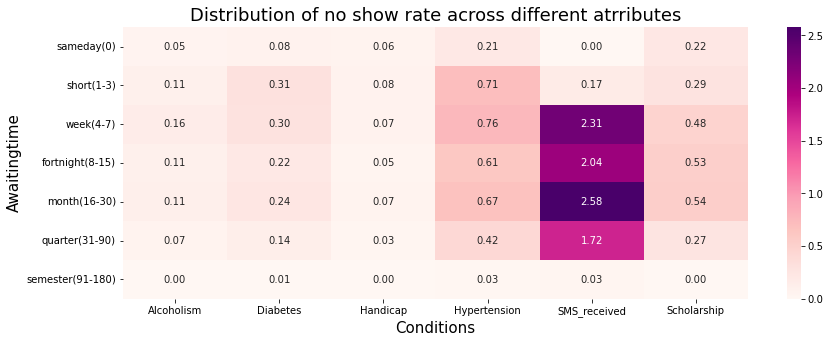

In [89]:
plt.figure(figsize=(14,5))
sns.heatmap(conditions_df,cmap='RdPu',annot=True, fmt='.2f')
plt.xlabel('Conditions',fontsize=15)
plt.ylabel('Awaitingtime',fontsize=15)
plt.title('Distribution of no show rate across different atrributes',fontsize=18);

> Patients that received SMS had the highest no show rates after a week maybe because 1 text message is not enough to remind them of their appointment,before a week they had low no show rates.

<a id='conclusions'></a>
## Conclusions

This analysis was carried out to explore the medical appointment no-show dataset, which contains over 100k appointments and 14 features. We used this notebook to gain insight on the possible reasons behind the high rate of no-show on appointments which has affected aid utilization,first class health services and loss of predicted revenue. It is important we understand, that with the provided data and the applied methods used in this analysis, it is not possible to affirm any statement with statistical validity nor causal relations. This insights obtained through this analysis can, instead, inform and direct in-depth research on the subject, in order to validate the causes of the appointment missing and find ways to mitigate this issue.

#### Limitation of the analysis
* There is no description on how the data were acquired
* Though they were few data to be cleaned there was still some outliers that will need to be verified for in depth research purposes

#### Analysis Overview
After rigorously going through the data i was able to ask some questions that could help gain insight on the statistics of the dataset:
* What is total number of Appointments and No show compared between the gender of the patient and the number of awaiting days ?
> Monthly waiting time has the most number of appointments and highest No Show rate in the chart, with female patients having the most number of appointments in all awaiting times. This analysis enlightens the fact that shorter waiting times would be more appealing to the patients
* What is total number of Appointments and No show compared between the gender and age of the patient ?
> Adults(19-59) have the highest number of appointments and highest no-show-rate while Adolescence have the least number of appointments and least no-show-rate
* Which day of the week has the highest number of appointments and no show rate ?
> From the bar plot graph above, the No-Show rate and No of Appointments are higher before midweek and lower after midweek. The No-Show rate and No of Appointments seems to be directly proportional(the higher the appointments the higher the no show rate). Tuesday has the highest number of appointments and no show rate, this tells us patients are like if their appointments where scheduled after midweek when their work for the week has become less intensed 
* Which Neighbourhood has the highest number of no show appointments and no show rate ?
> The graph tells us that the neighbourhood JARDIM CAMBURI has the highest number of no show appointments and no show rate while AEROPORTO has the lowest number of no show appointments and no show rate
* Is there a correlation between Scheduled Day of no show appointments and number of awaiting days ?
> Number of no shows has been increasing over the months even after the awaitingdays have been decreasing. which makes it a negative correlation between the two attributes
* Which attribute had the highest no show rate across waiting days ?
> Patients that received SMS had the highest no show rates after a week maybe because 1 text message is not enough to remind them of their appointment,before a week they had low no show rates.

<a id='references'></a>
## References

* Wikipedia contributors. Brazil. Wikipedia, The Free Encyclopedia. February 9, 2018, 22:06 UTC. Available at: https://en.wikipedia.org/w/index.php?title=Brazil&oldid=824851232. Accessed in May 17, 2022.
* Kaggle. Medical Appointment No Shows. Reviewed dataset. Available at: https://www.kaggle.com/joniarroba/noshowappointments. Accessed in May 17, 2022.
* Pandas User Guide. Available at: https://pandas.pydata.org/docs/user_guide/index.html. Accessed in May 17, 2022.
* Pandas - Assign string values based on multiple ranges. Available at: https://stackoverflow.com/questions/69138494/pandas-assign-string-values-based-on-multiple-ranges. Accessed in May 17, 2022.
* Pandas - Make a bar graph of 2 variables based on a dataframe. Available at: https://stackoverflow.com/questions/46794373/make-a-bar-graph-of-2-variables-based-on-a-dataframe. Accessed in May 17, 2022. 